# Example of Interval type-2 fuzzy system using crisp inputs:

## Determining fitness of a person based on thier height and weight

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt


In [2]:
def fuzz_Mem_Func(var, typeOfMf, lst):
    '''
    returns Upper membership values.
    
    keyword arguments:
    
    var -- x range of variable 
    typeOfMf -- type of membershi function
    lst -- list of values provided
    '''
    if typeOfMf == 'trimf':
        return fuzz.trimf(var,lst)
    elif typeOfMf == 'gaussmf':
        mean, sigma = lst
        return fuzz.gaussmf(var, mean, sigma)
    elif typeOfMf == 'gauss2mf':
        mean1, sigma1, mean2, sigma2 = lst
        return fuzz.gauss2mf(var, mean1, sigma1, mean2, sigma2)
    elif typeOfMf == 'trapmf':
        return fuzz.trapmf(var, lst)
    elif typeOfMf == 'gbellmf':
        a,b,c = lst
        return fuzz.gbellmf(var, a, b, c)

In [3]:
def fuzz_Inputs(x_var, var):
    '''
    returns the list membership values along the range
    and the list of linguistic terms chosen.
    
    keyword arguments:
    
    x_var -- x range of the variable var
    var -- variable name
    '''

#   input linguistic terms for a linguistic variable. 
    lst = input(f'Enter the fuzzy inputs for variable {var}:').split(' ')

    In_ = [] #list to store the membership values.
    
    for i in range(len(lst)):
        typeofMf = input(f'Enter the type of membership function for {lst[i]} {var}:')
        
        '''The input format here for membership values.
        
        ex: trapziodal func: [a b c d]
        traingular func: [a b c]
        '''
        varType = [type(x_var[0])(x) for x in input(f"Enter the numbers for {lst[i]} {var}:").split(' ')]
        
        varmf = fuzz_Mem_Func(x_var, typeofMf, varType)
        In_.append(varmf)
    
    lstoflst = [In_, lst]
    return lstoflst

In [4]:
def fuzz_plot_mf(x_var, var_, var_types, varName):
    '''
    plots the membership graph for variable varName.
    
    keyword argument:
    
    varName -- name of the variable
    x_var -- x range of variable varName
    var_ -- list of membership values
    var_types -- list storing the linguistic terms
    '''
    print(f'The following plot shows the {varName}')
    fig, ax = plt.subplots(figsize=(8, 3))

    for i in range(len(var_)):
        ax.plot(x_var, var_[i], linewidth=1.5, label=var_types[i])
    ax.set_title(varName)
    ax.legend()

In [ ]:
def fuzz_make_rules(var1_types, var2_types):
    '''
    returns a list with decided rules.
    
    keyword arguments:
    
    var1_types -- linguistic terms of first variable
    var2_types -- linguistic terms of second variable
    '''
    
    rule_lst = []
    for i in range(len(var1_types)):
        rule_ = []
        for j in range(len(var2_types)):
            rule_.append(int(input(f'Enter the number corresponding to the above fitness level menu for rule {var1_types[i]} and {var2_types[j]}: ')))
        rule_lst.append(rule_)
    return rule_lst

In [5]:
def fuzz_Interplot_mem(x_var, lst, singleton_value):
    '''
    Does the inter plotting bw singleton value and the membership value.
    
    keywords arguments:
    
    x_var -- x range of values of a variable
    var -- list of membership values
    singleton_value -- input value
    '''
    memvalue = []
    for i in range(len(lst)):
        memvalue.append(fuzz.interp_membership(x_var, lst[i], singleton_value))

    return memvalue

In [6]:
def fuzz_rule(row_memvalue, col_memvalue, output_, rule_lst):
    '''
    Maps the membership values of the antecedents with the consequent on the basis of decided rules.
    
    keyword arguments:
    
    row_memvalue -- membership values of a antecedent along the row
    col_memvalue -- membership values of a antecedent along the column
    output_ -- membership values of the consequent 
    rule_lst -- list containing the decided rules
    '''
    rule = [] #list stroing maped value of membership functions
    output_used = [] #list of membership values of the consequent used acc. to the decided rules
    for i in range(len(row_memvalue)):
        for j in range(len(col_memvalue)):
            fitness_used.append(output_[rule_lst[i][j] - 1])
            rule.append(np.fmin(np.fmin(row_memvalue[i], col_memvalue[j]), output_[rule_lst[i][j] - 1]))

    return [rule, output_used]

In [1]:
def fuzz_plot_outputMf(x_var, rule, output_used):
    '''
    plot output membership function at a given singleton value.
    
    keyword arguments:
    
    x_var -- x range of variable
    rule -- mapped rules for memberships
    output_used -- type of linguistic terms of output used based on the rules decided
    '''
    zerolike = np.zeros_like(x_var)
    fig, ax0 = plt.subplots(figsize=(8, 3))

    for i in range(len(rule)):
        ax0.fill_between(x_var, zerolike, rule[i], facecolor='orange', alpha=0.7)
        ax0.plot(x_var, output_used[i], linewidth=0.5,linestyle='--')

    ax0.set_title('Output membership activity')

    # Turn off top/right axes
    for ax in (ax0,):
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()

    plt.tight_layout()
    return

In [8]:
def fuzz_aggregation(rule):
     '''
    aggregates the rules.
    
    keyword arguments:
    
    rule --  maped rule for membership
    '''
    l = len(rule) - 1
    npfmax = np.fmax(rule[l - 1], rule[l])
    for i in range(len(rule) - 2):
        l = (len(rule) - 1) - (i + 1)
        npfmax = np.fmax(rule[l - 1], npfmax)

    return npfmax

In [9]:
def fuzz_defuzz(x_var, R_combined):
    '''
    defuzzifies based on the aggregated rules.
    
    keyword arguments:
    
    x_var -- x range of variable
    R_combined_ -- aggregated rules for membership values
    '''
    output = fuzz.defuzz(x_var, R_combined, 'centroid')
    output_activation = fuzz.interp_membership(x_var, R_combined, output)
    lst = [output, output_activation]
    return lst

In [10]:
def fuzz_output(x_var, var, output, output_activation, R_combined):
    '''
    plots the ouput value along with the centroid.
    
    keyword arguments:
    
    x_var -- x range of the variable
    var -- membership values of the consequent
    output -- centroid value
    output_activation -- membership value of centroid value
    R_combined -- aggregated rules for membership functions 
    '''
    fig, ax0 = plt.subplots(figsize=(8, 3))
    zerolike = np.zeros_like(x_var)
    for i in range(len(var)):
        ax0.plot(x_var, var[i], linewidth=0.5, linestyle='--', )
    ax0.fill_between(x_var, zerolike, R_combined, facecolor='Orange', alpha=0.7)
    ax0.plot([output, output], [0, output_activation], 'k', linewidth=1.5, alpha=0.9)
    ax0.set_title('Aggregated membership and result (line)')

    # Turn off top/right axes
    for ax in (ax0,):
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()

    plt.tight_layout()
    print(f'Output = {output}')

# if __name__ == '__main__':

In [11]:
'''
input format:
x -- the starting value of the range.
y -- the upper bound of the range
z -- the incrementation value (the difference two values of the range)
'''
x, y, z = [int(x) for x in input("Enter the range of weight:").split(' ')]
x_weight = np.arange(x, y, z)

x, y, z = [float(x) for x in input("Enter the range of height:").split(' ')]
x_height = np.arange(x, y, z)

x, y, z = [int(x) for x in input("Enter the range of fitnes level:").split(' ')]
x_fitnessLevel = np.arange(x, y, z)

Enter the range of weight:30 101 1
Enter the range of height:4 7.6 0.1
Enter the range of fitnes level:0 11 1


In [13]:
'''
w -- 2D tuple containing seperate UMF and LMF of weight(here).
w_types -- list containg the linguistic terms for weight(here).
'''
w_, w_types = fuzz_Inputs(x_weight, 'weight')

Enter the fuzzy inputs for variable weight:thin medium fat
['thin', 'medium', 'fat']
Enter the type of membership function for thin weight:trapmf
Enter the numbers for thin weight:20 30 40 50
Enter the type of membership function for medium weight:trapmf
Enter the numbers for medium weight:40 55 65 100
Enter the type of membership function for fat weight:trimf
Enter the numbers for fat weight:75 100 100


In [14]:
h_,h_types = fuzz_Inputs(x_height, 'height')


Enter the fuzzy inputs for variable height:short medium tall
['short', 'medium', 'tall']
Enter the type of membership function for short height:trimf
Enter the numbers for short height:4 4 5.2
Enter the type of membership function for medium height:trimf
Enter the numbers for medium height:4 5.6 7.5
Enter the type of membership function for tall height:trimf
Enter the numbers for tall height:6 7.6 7.6


In [16]:
f_,f_types = fuzz_Inputs(x_fitnessLevel, 'fitness level')

Enter the fuzzy inputs for variable fitness level:unfit moderatelyFit fit
['unfit', 'moderatelyFit', 'fit']
Enter the type of membership function for unfit fitness level:trapmf
Enter the numbers for unfit fitness level:-1 0 3 6
Enter the type of membership function for moderatelyFit fitness level:trimf
Enter the numbers for moderatelyFit fitness level:3 6 10
Enter the type of membership function for fit fitness level:trimf
Enter the numbers for fit fitness level:7 10 10


The following plot shows the Weight
The following plot shows the Height
The following plot shows the Fitness Level


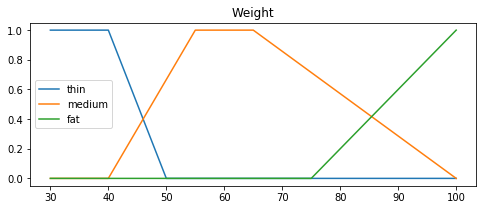

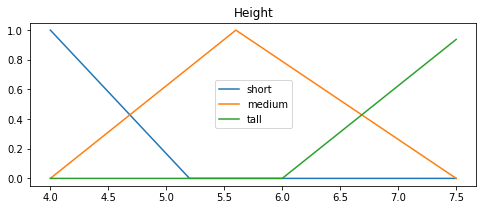

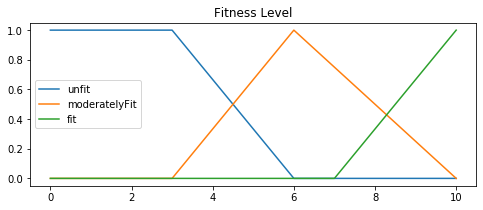

In [17]:
'''
Ploting the membership values for each of antecedent and consequent
'''
fuzz_plot_mf(x_weight, w_, w_types, 'Weight')
fuzz_plot_mf(x_height, h_, h_types, 'Height')
fuzz_plot_mf(x_fitnessLevel, f_,f_types, 'Fitness Level')

In [ ]:
'''
Displays the list of linguistic terms of the consequent, corresponding to a value.
'''
for i in range(len(f_types)):
    print(f'{i+1}) {f_types[i]}')

In [ ]:
'''
rule_lst -- list of rules decided
'''
rule_lst = fuzz_make_rules(w_types, h_types)

In [18]:
'''
x_memvalue -- membership value at a particular single value for the antecedent x(weight and height here).
'''
weight = int(input('Enter Value for weight:'))
height = float(input('Enter value for height:'))

Enter Value for weight:60 
Enter value for height:5.6


In [19]:
w_memvalue = fuzz_Interplot_mem(x_weight, w_, weight)
h_memvalue = fuzz_Interplot_mem(x_height, h_, height)

In [21]:
'''
rule -- maped rule for membership values.
fitness_used -- list of fitness values decided based the rule_lst(to be used for ploting)
'''
rule, fitness_used = fuzz_rule(w_memvalue, h_memvalue, f_, rule_lst)

Enter the number corresponding to the above fitness level menu for rule thin and short3
Enter the number corresponding to the above fitness level menu for rule thin and medium2
Enter the number corresponding to the above fitness level menu for rule thin and tall1
Enter the number corresponding to the above fitness level menu for rule medium and short2
Enter the number corresponding to the above fitness level menu for rule medium and medium3
Enter the number corresponding to the above fitness level menu for rule medium and tall2
Enter the number corresponding to the above fitness level menu for rule fat and short1
Enter the number corresponding to the above fitness level menu for rule fat and medium2
Enter the number corresponding to the above fitness level menu for rule fat and tall3


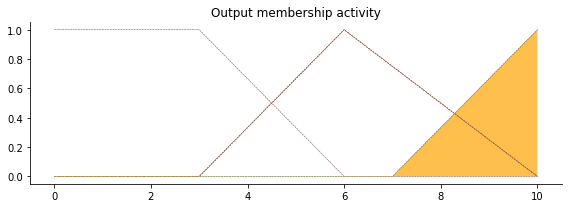

In [23]:
fuzz_plot_outputMf(x_fitnessLevel, rule, fitness_used)


In [24]:
'''
R_combined -- aggregated rule for membership values.
'''
R_combined = fuzz_aggregation(rule)

In [25]:
'''
fitnessLevel -- output value(centroid value)
fitness_activation -- corresponding membership value of output
'''
fitnessLevel, fitness_activation = fuzz_defuzz(x_fitnessLevel, R_combined)

Fitness Level = 9.0


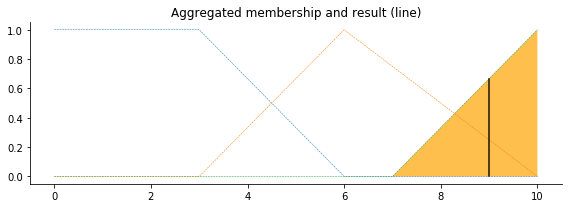

In [26]:
fuzz_output(x_fitnessLevel, f_, fitnessLevel, fitness_activation, R_combined)